In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


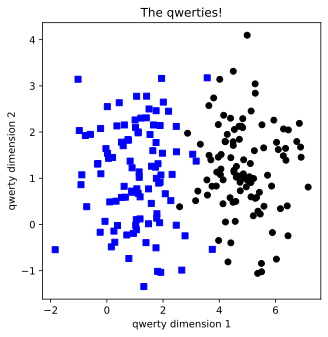

In [23]:
#creating the data
nPerClust=100 # number of data points per cluster
blur=1 # how much randomness is added to each cluster.high blur results in overlapping clusters


A=[1,1] # the  center of cluster A
B=[5,1] # thwe center of cluster B

#generat the data points for both clusters
a=[A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
b=[B[0]+np.random.randn(nPerClust)*blur,B[1]+np.random.randn(nPerClust)*blur]

# true labels of the data
labels_np=np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))
#np.zeros((100,1)) creates a column vector of 100 zeros .np.vstack takes two (100,1) vectrs and stack them one on top of another
#resulting shape (200,1)

data_np=np.hstack((a,b)).T
#shape of data_np is now (200,2)

#convert to Pytorch tensors

data=torch.tensor(data_np).float()
labels=torch.tensor(labels_np).float()
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()



In [24]:
#inspecting the types
print(type(data_np))
print(np.shape(data_np))
print(' ')
print(type(data))
print(np.shape(data))

<class 'numpy.ndarray'>
(200, 2)
 
<class 'torch.Tensor'>
torch.Size([200, 2])


In [25]:
#building the model
ANNclassify=nn.Sequential(
    nn.Linear(2,1),# input layer
    nn.ReLU(), #activation unit
    nn.Linear(1,1), #output unit
    nn.Sigmoid(),
    
)
ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [26]:
#other model features
learningRate=.01
#loss function
lossfun=nn.BCELoss()

#optimier
optimizer=torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)

In [27]:
 #training the model

numepochs=1000
losses=torch.zeros(numepochs)

for epochi in range(numepochs):
    #forward pass
    yHat=ANNclassify(data)

    #compute loss
    loss=lossfun(yHat,labels)
    losses[epochi]=loss
    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

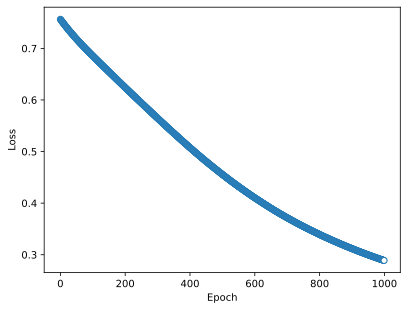

In [28]:


# show the losses

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
     


In [30]:
#compute the predictions

#manually computing losses
#final foward pass
predictions=ANNclassify(data)
#predictions has the shape (200,1) where each entry is the probability that the sample belogs to class 1

#converting the probabilities to predicted labels
predlabels=predictions>.5
#predlabel has the shape (200,1) but contains boolean values

misclassified=np.where(predlabels!=labels)[0]

totalacc=100-100*len(misclassified)/(2*nPerClust)
print('Final accuracy: %g%%' %totalacc)


Final accuracy: 94.5%


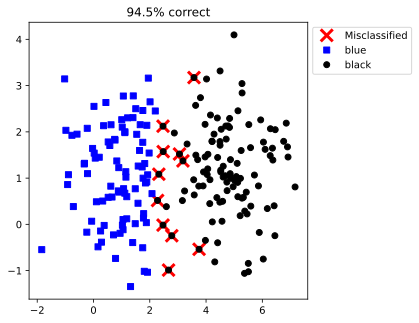

In [31]:
# plot the labeled data
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0] ,data[misclassified,1],'rx',markersize=12,markeredgewidth=3)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0] ,data[np.where(predlabels)[0],1] ,'ko')

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')
plt.show()